# Data exploration 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./data/marketing_campaign_dataset.csv') 
df

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10


In [3]:
df.dtypes

Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost     object
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
dtype: object

In [4]:
# Convert Acquisition_Cost 
df['Acquisition_Cost'] = (
    df['Acquisition_Cost']
    .replace('[\$,]', '', regex=True)
    .astype(float)
) 
df['Date'] = pd.to_datetime(df['Date']) 

#remove leading and trailing spaces from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df.dtypes


Campaign_ID                  int64
Company                     object
Campaign_Type               object
Target_Audience             object
Duration                    object
Channel_Used                object
Conversion_Rate            float64
Acquisition_Cost           float64
ROI                        float64
Location                    object
Language                    object
Clicks                       int64
Impressions                  int64
Engagement_Score             int64
Customer_Segment            object
Date                datetime64[ns]
dtype: object

In [5]:
df

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,18365.0,2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,8168.0,4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,13397.0,3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,18508.0,3.86,Houston,French,528,2763,1,Foodies,2021-12-10


In [6]:
#checking for missing values 
df.isna().sum() 

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

no missing values were found in the data set, so no need to drop or modify any data because of that. lets next check to see if any of the categories dominate the data set more than others. This is imporant because we dont want any models to have bias towards any particular category. 

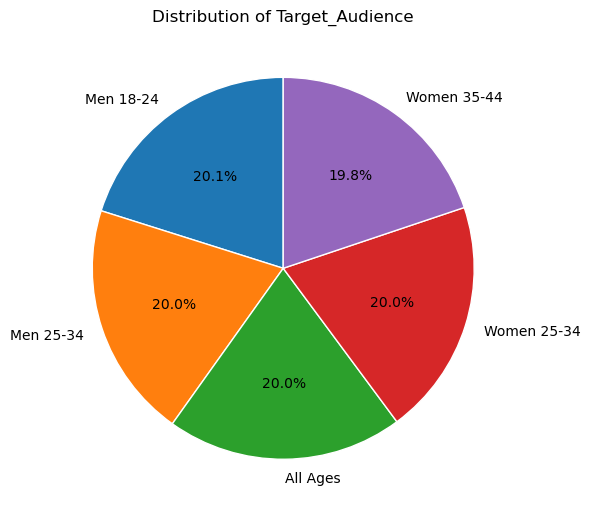

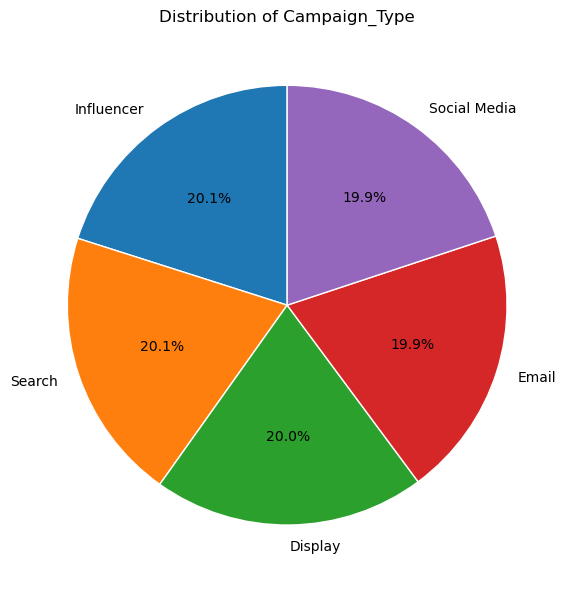

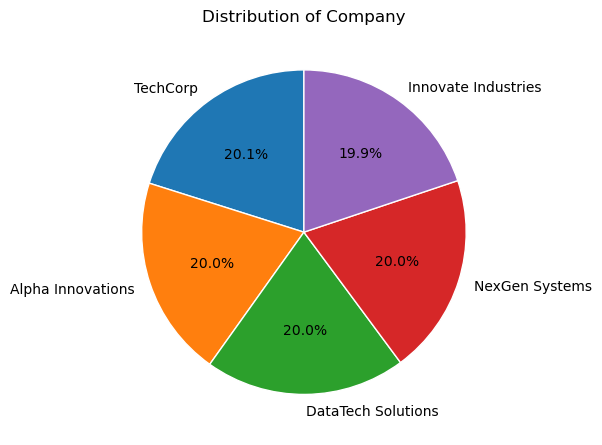

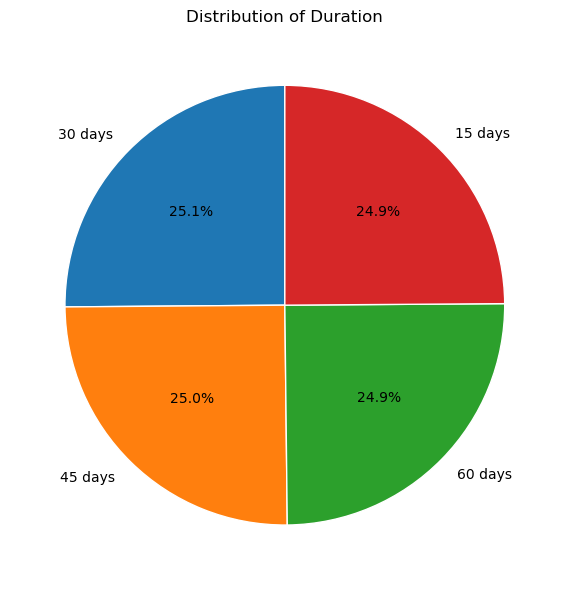

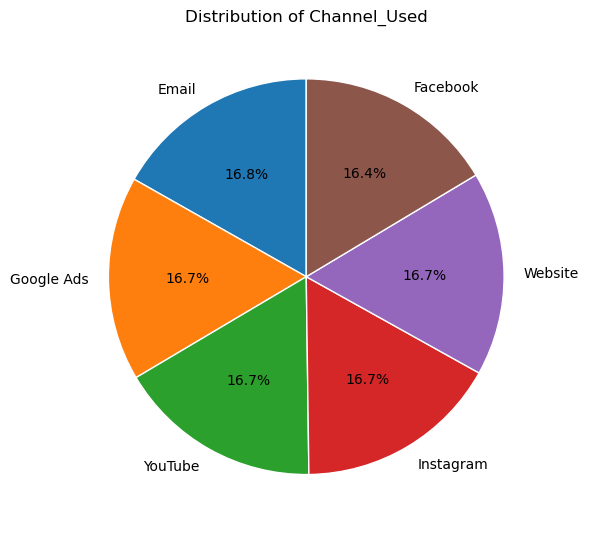

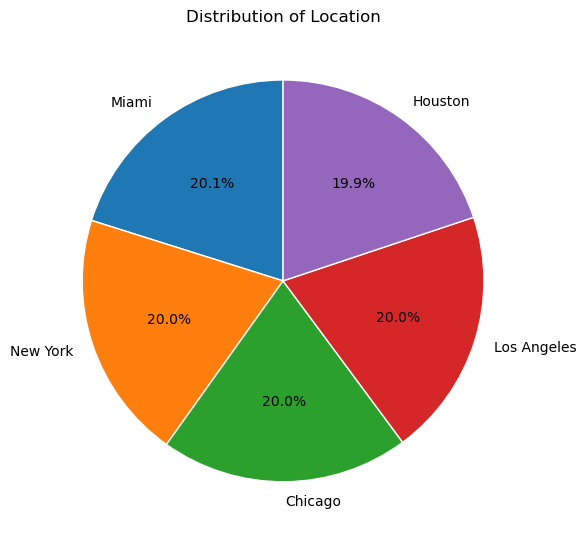

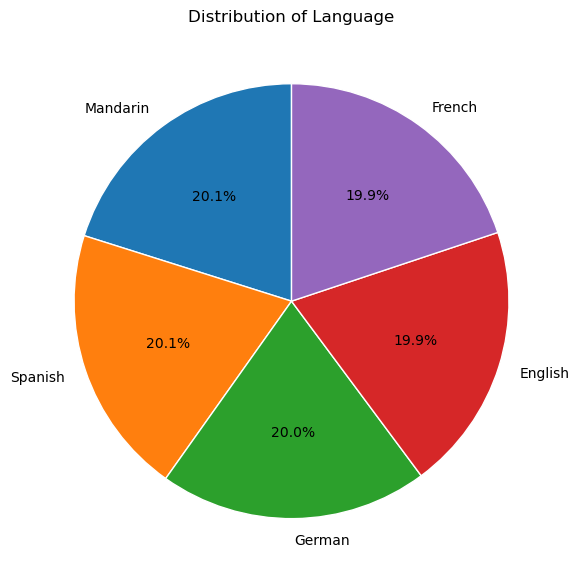

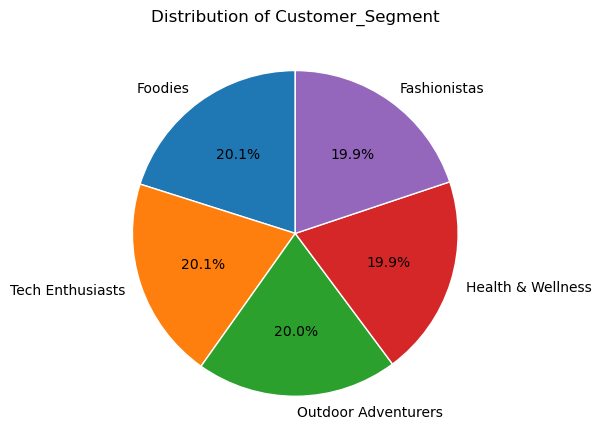

In [7]:
columns_to_plot = [
    'Target_Audience',
    'Campaign_Type', 
    'Company',
    'Duration',
    'Channel_Used',
    'Location',
    'Language',
    'Customer_Segment'
] 

for col in columns_to_plot:
    counts = df[col].value_counts()
    plt.figure(figsize=(6, 6))
    counts.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Remove y-axis label
    plt.tight_layout()
    plt.show()

Each of these fields are showing a nearly uniform split across their unique values. This means that no single category should dominate any column and should not expect strong biases when using these features in a model. Now lets check for any seasonality in the data. 

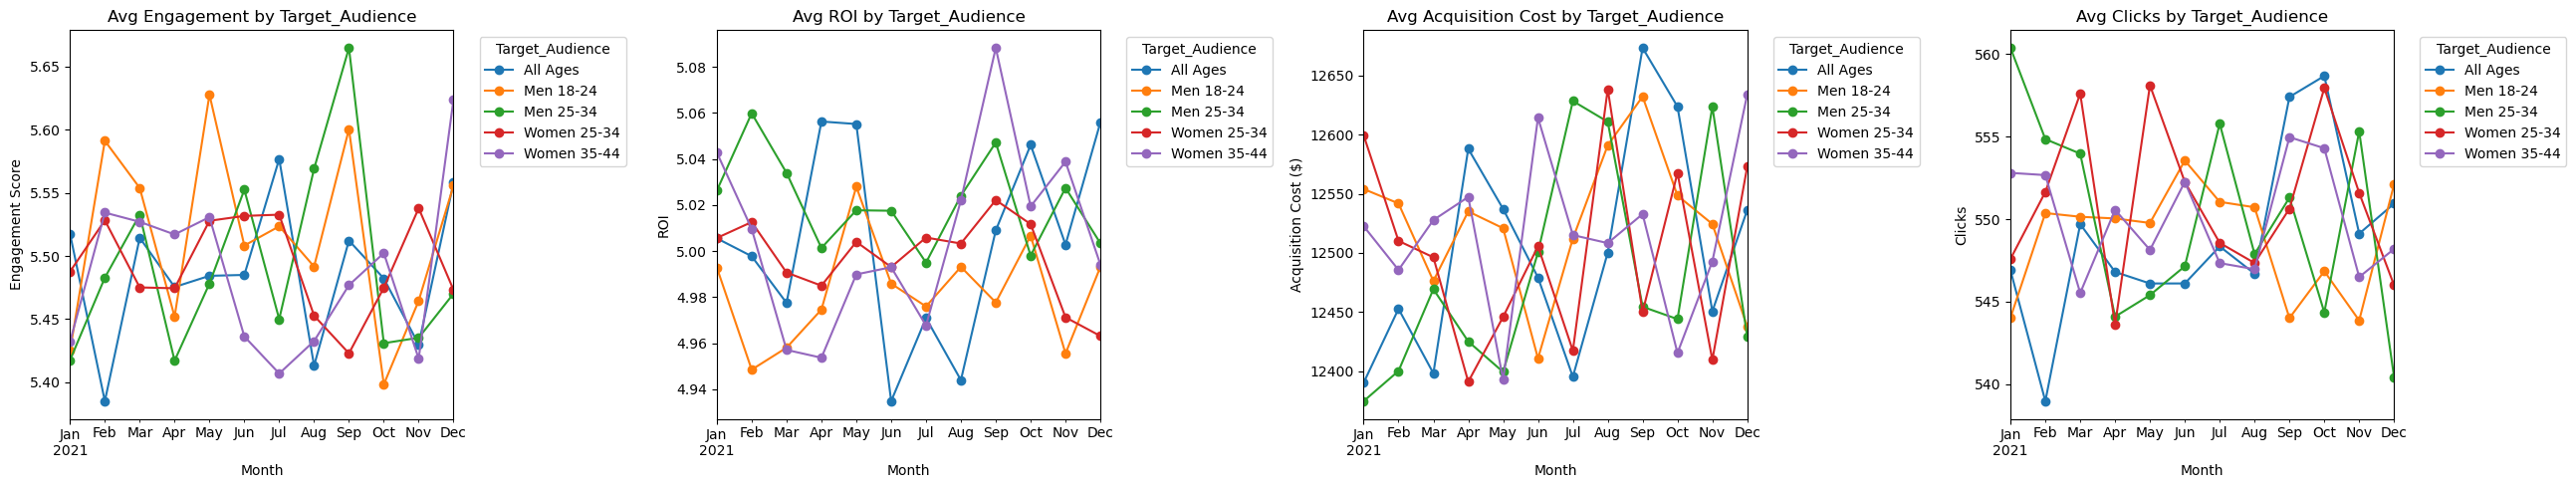

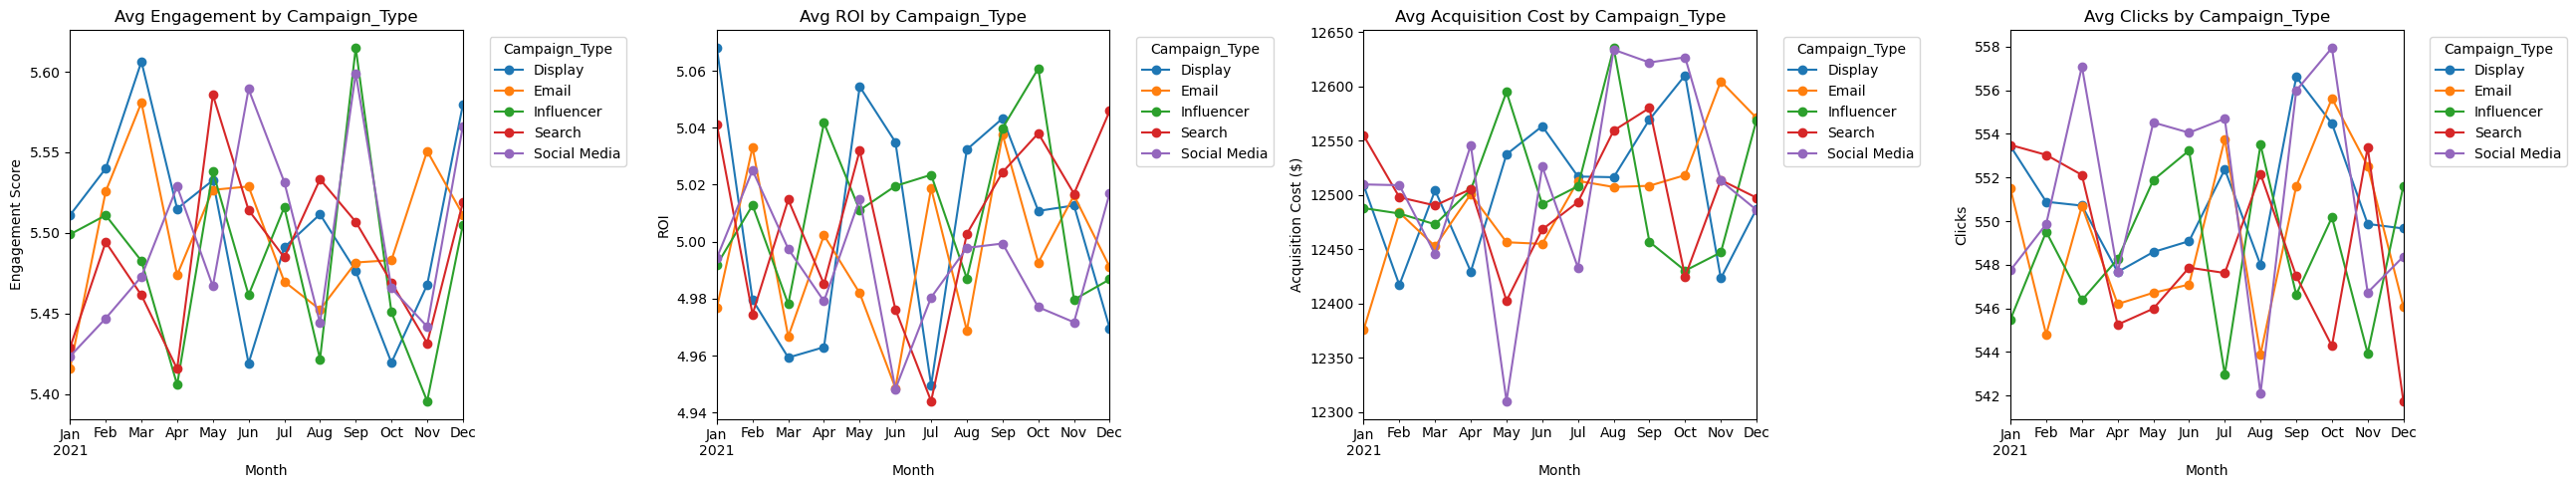

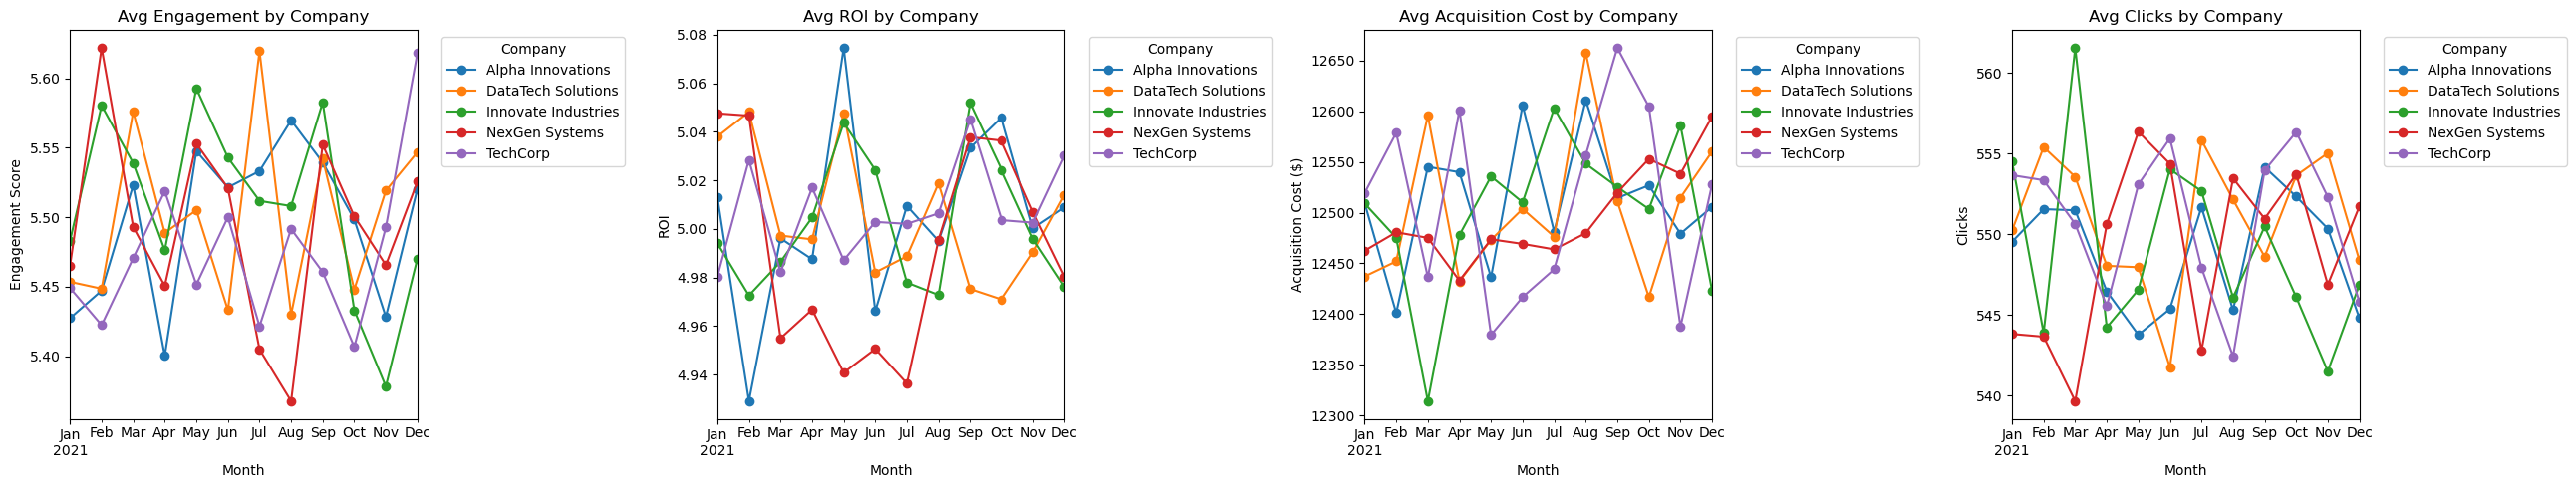

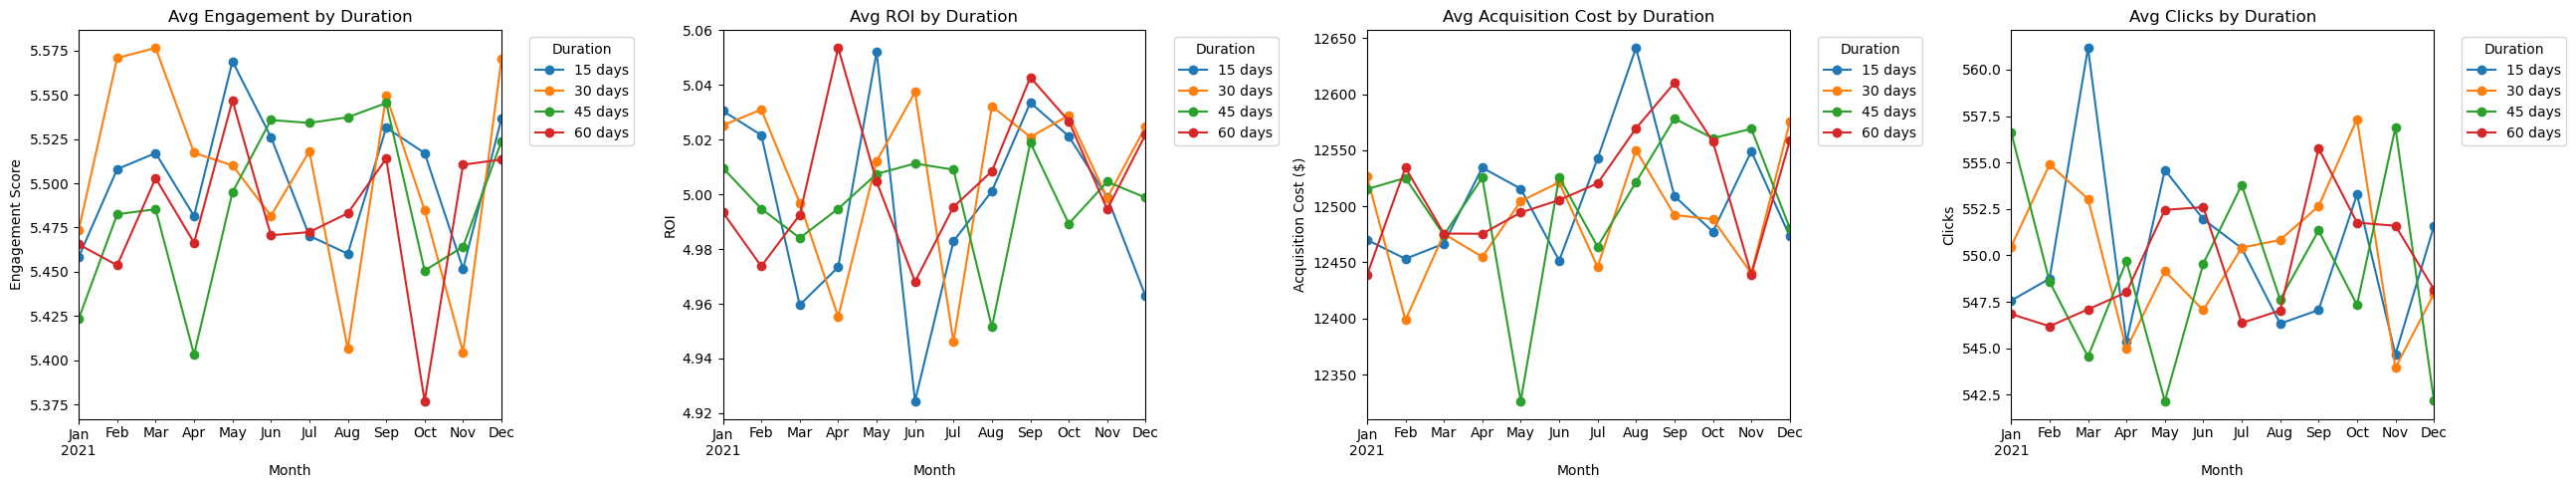

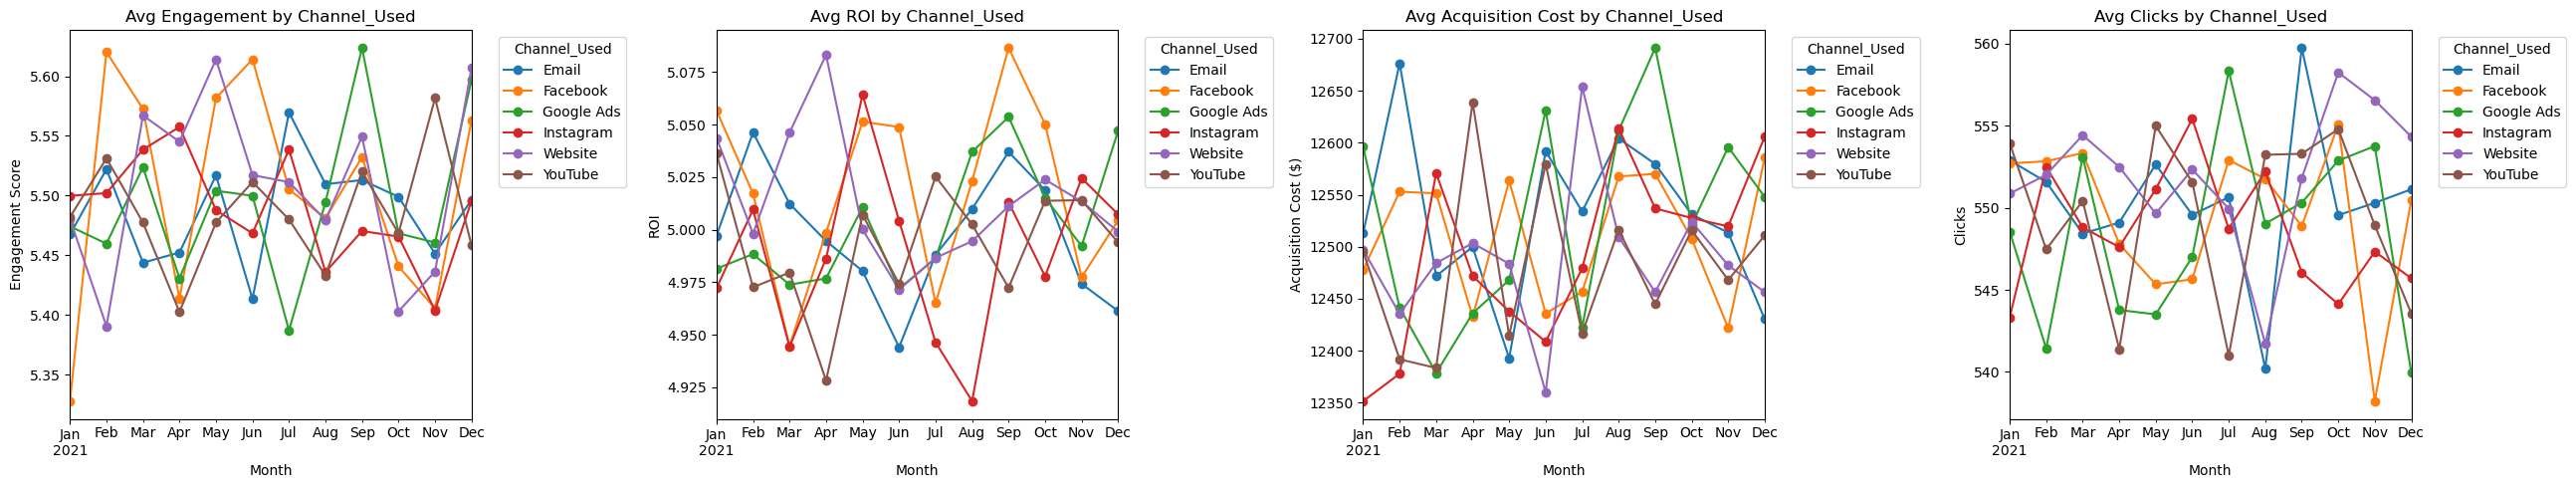

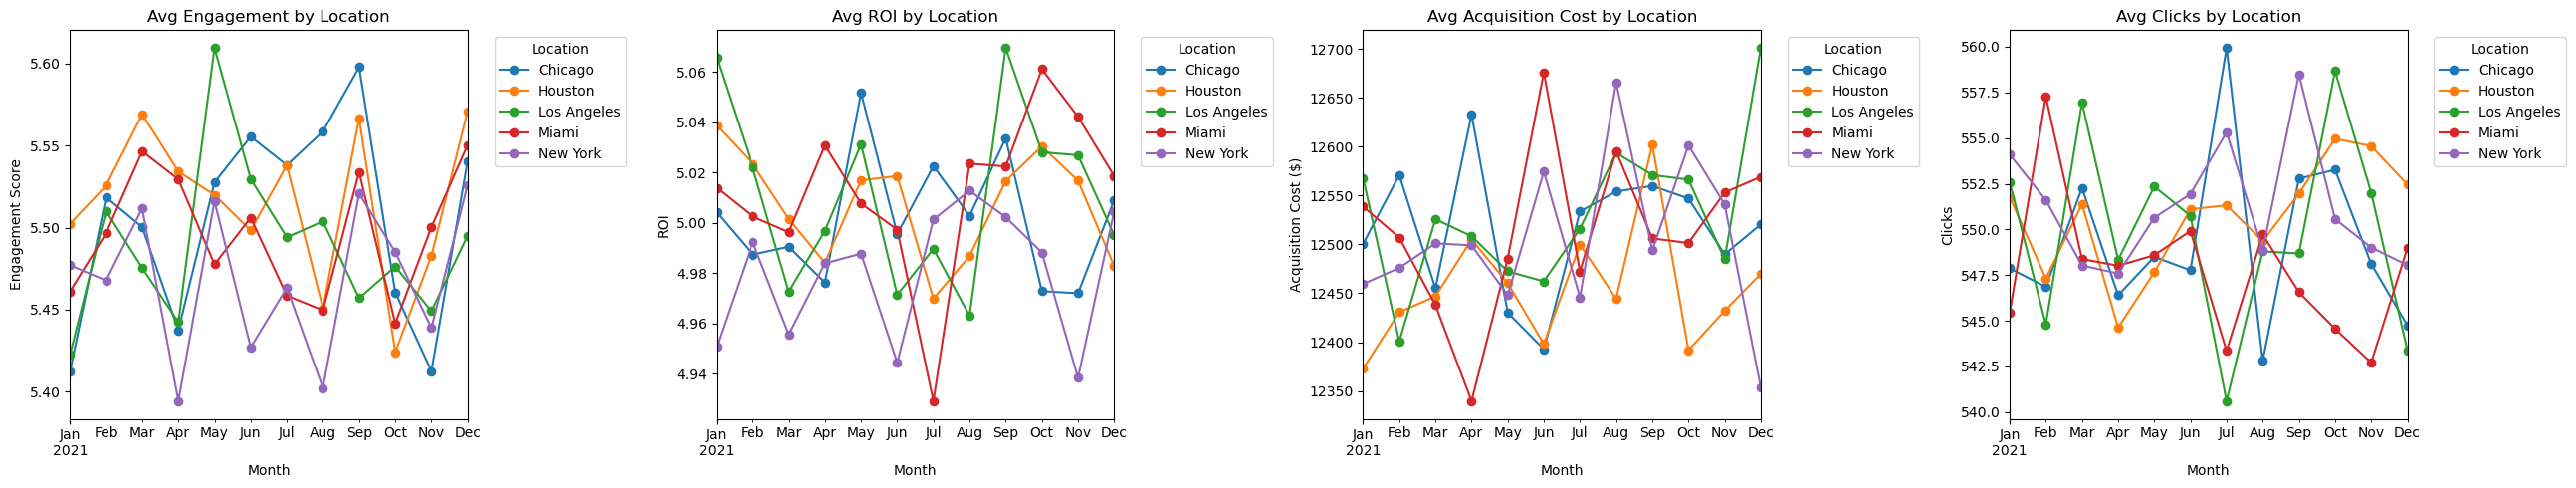

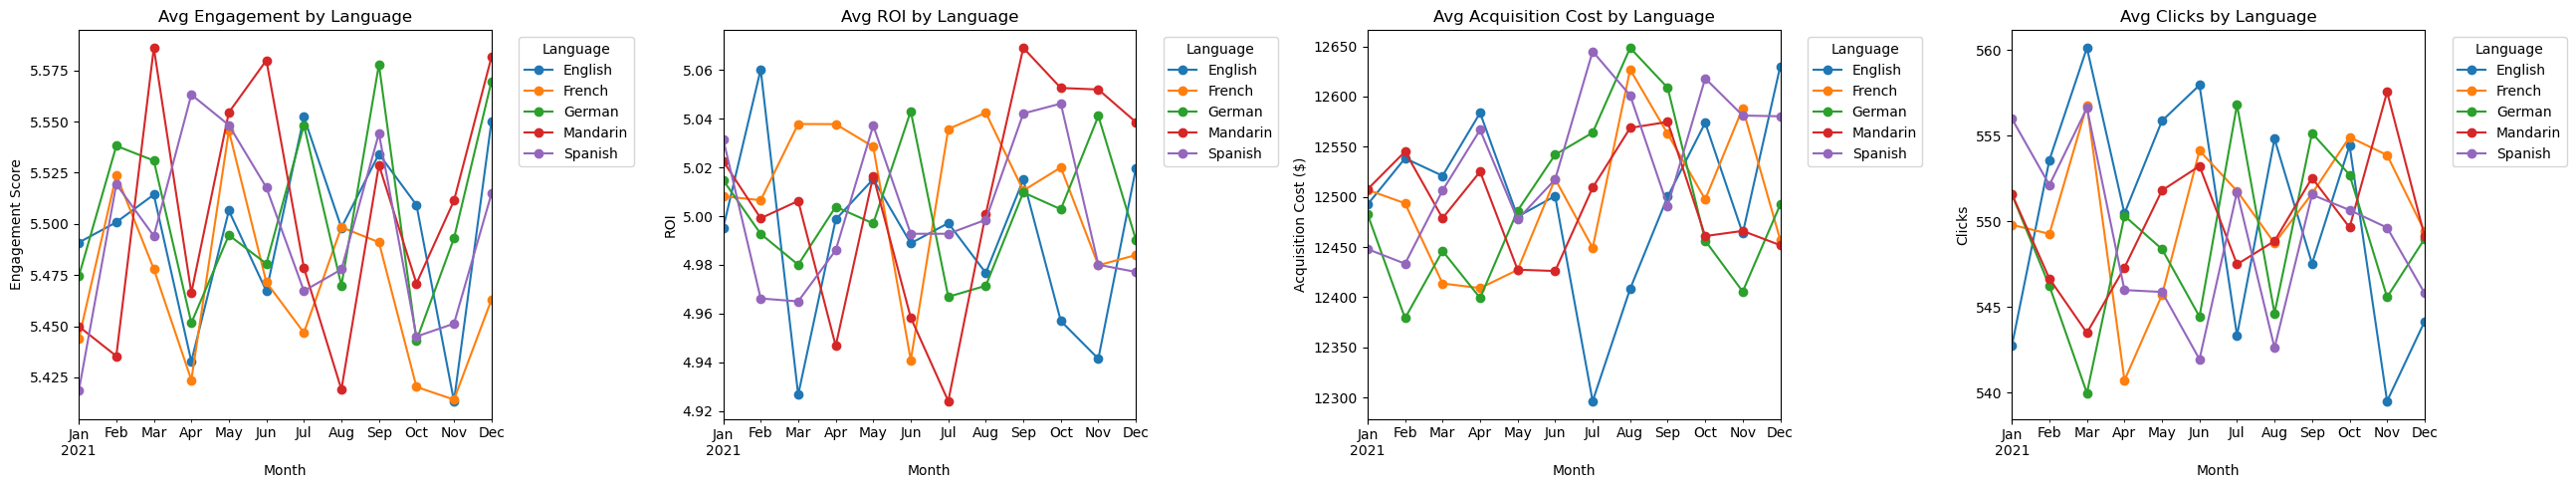

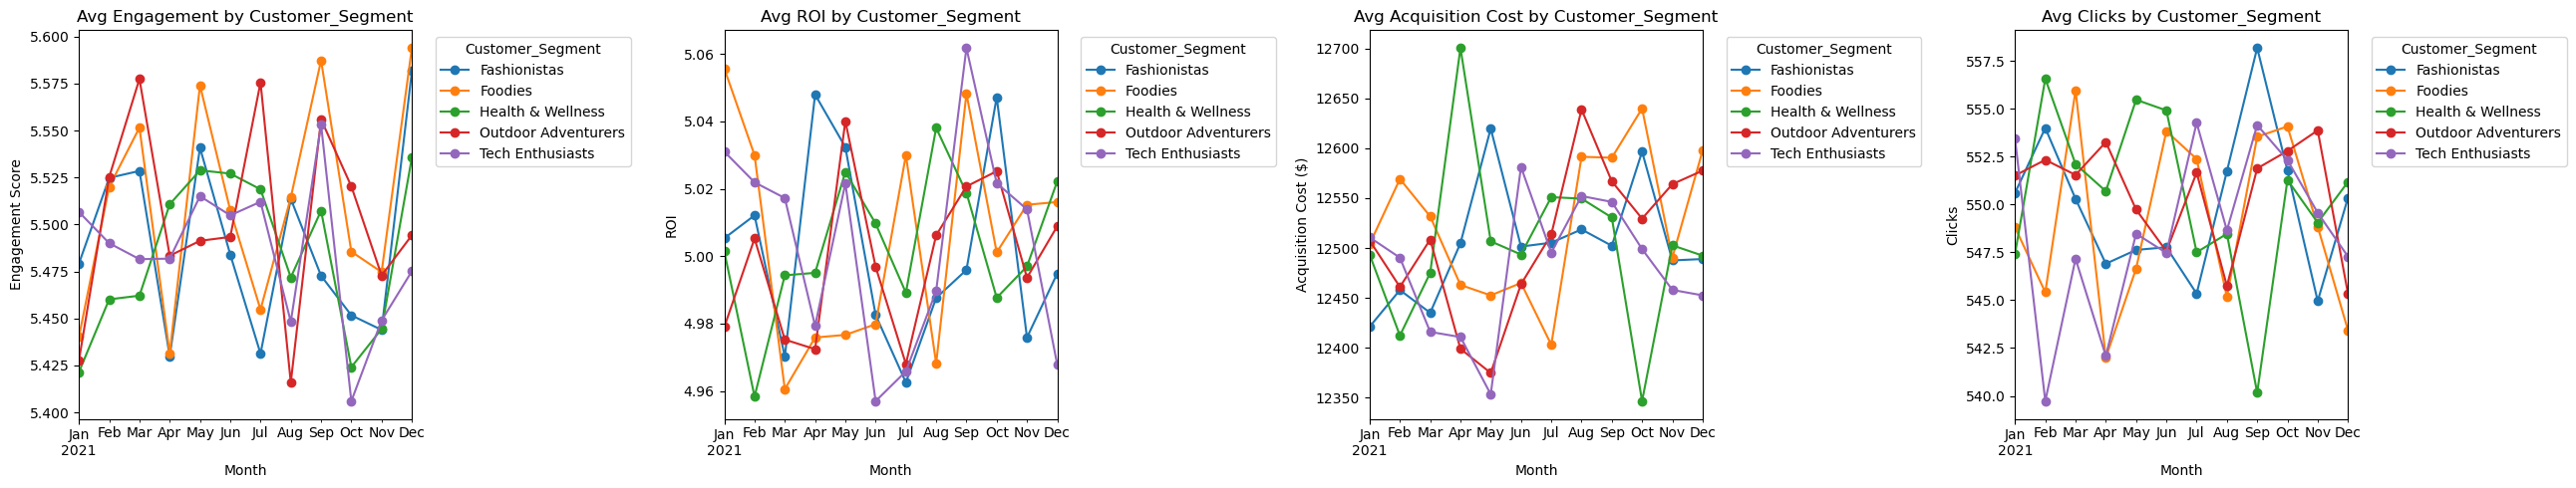

In [8]:


columns_to_plot = [
    'Target_Audience',
    'Campaign_Type', 
    'Company',
    'Duration',
    'Channel_Used',
    'Location',
    'Language',
    'Customer_Segment'
]

for col in columns_to_plot:
    monthly_engagement = (
        df
        .groupby([pd.Grouper(key='Date', freq='M'), col])['Engagement_Score']
        .mean()
        .unstack(col)
    )
    
    monthly_roi = (
        df
        .groupby([pd.Grouper(key='Date', freq='M'), col])['ROI']
        .mean()
        .unstack(col)
    )
    
    monthly_cost = (
        df
        .groupby([pd.Grouper(key='Date', freq='M'), col])['Acquisition_Cost']
        .mean()
        .unstack(col)
    )
    
    monthly_clicks = (
        df
        .groupby([pd.Grouper(key='Date', freq='M'), col])['Clicks']
        .mean()
        .unstack(col)
    )
    
    # Create 4 subplots
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(26, 5), sharex=True)
    
    monthly_engagement.plot(marker='o', linewidth=1.5, ax=ax1)
    ax1.set_title(f'Avg Engagement by {col}')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Engagement Score')
    ax1.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    monthly_roi.plot(marker='o', linewidth=1.5, ax=ax2)
    ax2.set_title(f'Avg ROI by {col}')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('ROI')
    ax2.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    monthly_cost.plot(marker='o', linewidth=1.5, ax=ax3)
    ax3.set_title(f'Avg Acquisition Cost by {col}')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Acquisition Cost ($)')
    ax3.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    monthly_clicks.plot(marker='o', linewidth=1.5, ax=ax4)
    ax4.set_title(f'Avg Clicks by {col}')
    ax4.set_xlabel('Month')
    ax4.set_ylabel('Clicks')
    ax4.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

There is clearly a seasonal pattern in the data for each category. Engagement, Clicks and ROI starting high in the year before dropping in the summer only to pick up again in the fall. For acquisition cost there seems to be a similar pattern expect a lot more spending is seen closer to the fall and winter. This leads us to believe we should include a month column or season column derived from the date column to encode into the model. 

In [9]:
df['Month'] = df['Date'].dt.month

season_map = {
    1: 'Winter',  2: 'Winter',  3: 'Spring',
    4: 'Spring',  5: 'Spring',  6: 'Summer',
    7: 'Summer',  8: 'Summer',  9: 'Fall',
    10: 'Fall',   11: 'Fall',   12: 'Winter'
}
df['Season'] = df['Month'].map(season_map)  

#drop date column because we have month column and season column 
df = df.drop(columns=['Date'])

df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Month,Season
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,1,Winter
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,1,Winter
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,1,Winter
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,1,Winter
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,1,Winter


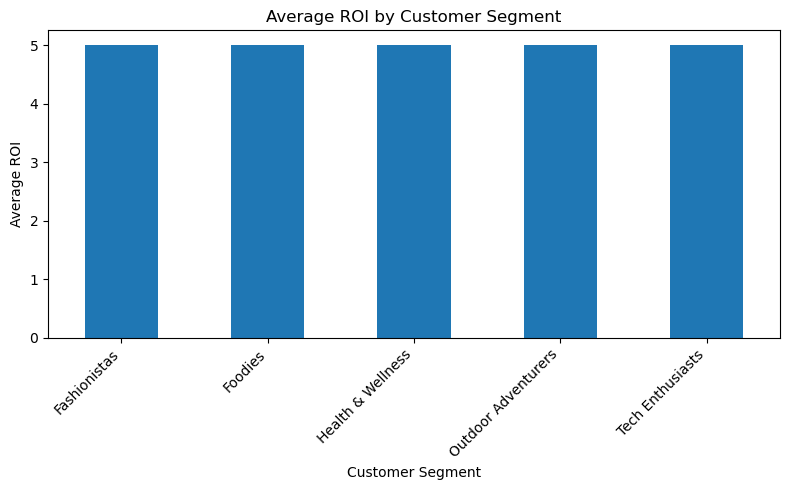

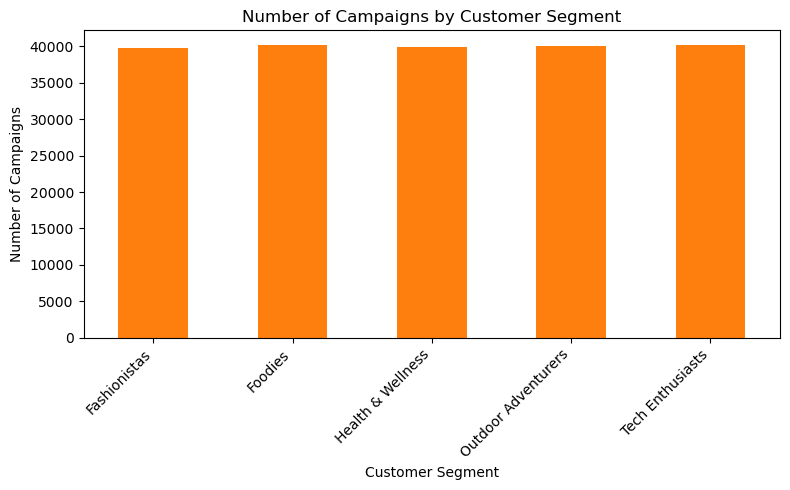

In [10]:
roi_by_segment = df.groupby('Customer_Segment')['ROI'].mean().sort_index()
count_by_segment = df['Customer_Segment'].value_counts().sort_index()

# Plot average ROI per customer segment
plt.figure(figsize=(8, 5))
roi_by_segment.plot.bar(color='#1f77b4')
plt.title('Average ROI by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot number of campaigns per customer segment
plt.figure(figsize=(8, 5))
count_by_segment.plot.bar(color='#ff7f0e')
plt.title('Number of Campaigns by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Encoding:

One‐hot encode the following columns, dont need company column because it doesnt add any value to the model espcecially when users arent even going to be able to select the company. Deciding to drop the company column to generalize the model to any brand. 


In [11]:
df = df.drop(columns=['Company']) 
#also drop campaign_id column because it doesnt add any value to the model 
df = df.drop(columns=['Campaign_ID']) 

df_encoded = pd.get_dummies(
    df,
    columns=[
        'Campaign_Type',
        'Target_Audience',
        'Channel_Used',
        'Location',
        'Language',
        'Customer_Segment',
        'Season',
        'Month'
    ],
    drop_first=False
)  

# mapping from “Duration” column to ordinal integers
duration_map = {
    '15 days': 0,
    '30 days': 1,
    '45 days': 2,
    '60 days': 3
}

# Apply the mapping
df_encoded['Duration_encoded'] = df_encoded['Duration'].replace(duration_map)  
#drop og duration column because we have duration_encoded columns 
df_encoded = df_encoded.drop(columns=['Duration'])
df_encoded.head() 



,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Campaign_Type_Display,Campaign_Type_Email,Campaign_Type_Influencer,Campaign_Type_Search,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Duration_encoded
0,0.04,16174.0,6.29,506,1922,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.12,11566.0,5.61,116,7523,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0.07,10200.0,7.18,584,7698,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.11,12724.0,5.55,217,1820,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0.05,16452.0,6.50,379,4201,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#display all columns from df_encoded
df_encoded.columns

Index(['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions',
       'Engagement_Score', 'Campaign_Type_Display', 'Campaign_Type_Email',
       'Campaign_Type_Influencer', 'Campaign_Type_Search',
       'Campaign_Type_Social Media', 'Target_Audience_All Ages',
       'Target_Audience_Men 18-24', 'Target_Audience_Men 25-34',
       'Target_Audience_Women 25-34', 'Target_Audience_Women 35-44',
       'Channel_Used_Email', 'Channel_Used_Facebook',
       'Channel_Used_Google Ads', 'Channel_Used_Instagram',
       'Channel_Used_Website', 'Channel_Used_YouTube', 'Location_Chicago',
       'Location_Houston', 'Location_Los Angeles', 'Location_Miami',
       'Location_New York', 'Language_English', 'Language_French',
       'Language_German', 'Language_Mandarin', 'Language_Spanish',
       'Customer_Segment_Fashionistas', 'Customer_Segment_Foodies',
       'Customer_Segment_Health & Wellness',
       'Customer_Segment_Outdoor Adventurers',
       'Customer_Segment_Tech Enthusi

# Normalization
## MinMaxScaler to scale numeric features in the same 0,1 range: 

In [13]:
# List of numeric columns to normalize
numeric_cols = [
    'Conversion_Rate', 
    'Acquisition_Cost', 
    'ROI', 
    'Clicks', 
    'Impressions', 
    'Engagement_Score', 
    'Duration_encoded'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols]) 

df_encoded.head()

,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Campaign_Type_Display,Campaign_Type_Email,Campaign_Type_Influencer,Campaign_Type_Search,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Duration_encoded
0,0.214286,0.744933,0.715000,0.451111,0.102444,0.555556,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.333333
1,0.785714,0.437733,0.601667,0.017778,0.724778,0.666667,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
2,0.428571,0.346667,0.863333,0.537778,0.744222,0.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.333333
3,0.714286,0.514933,0.591667,0.130000,0.091111,0.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
4,0.285714,0.763467,0.750000,0.310000,0.355667,0.222222,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


KeyError: 'Customer_Segment'

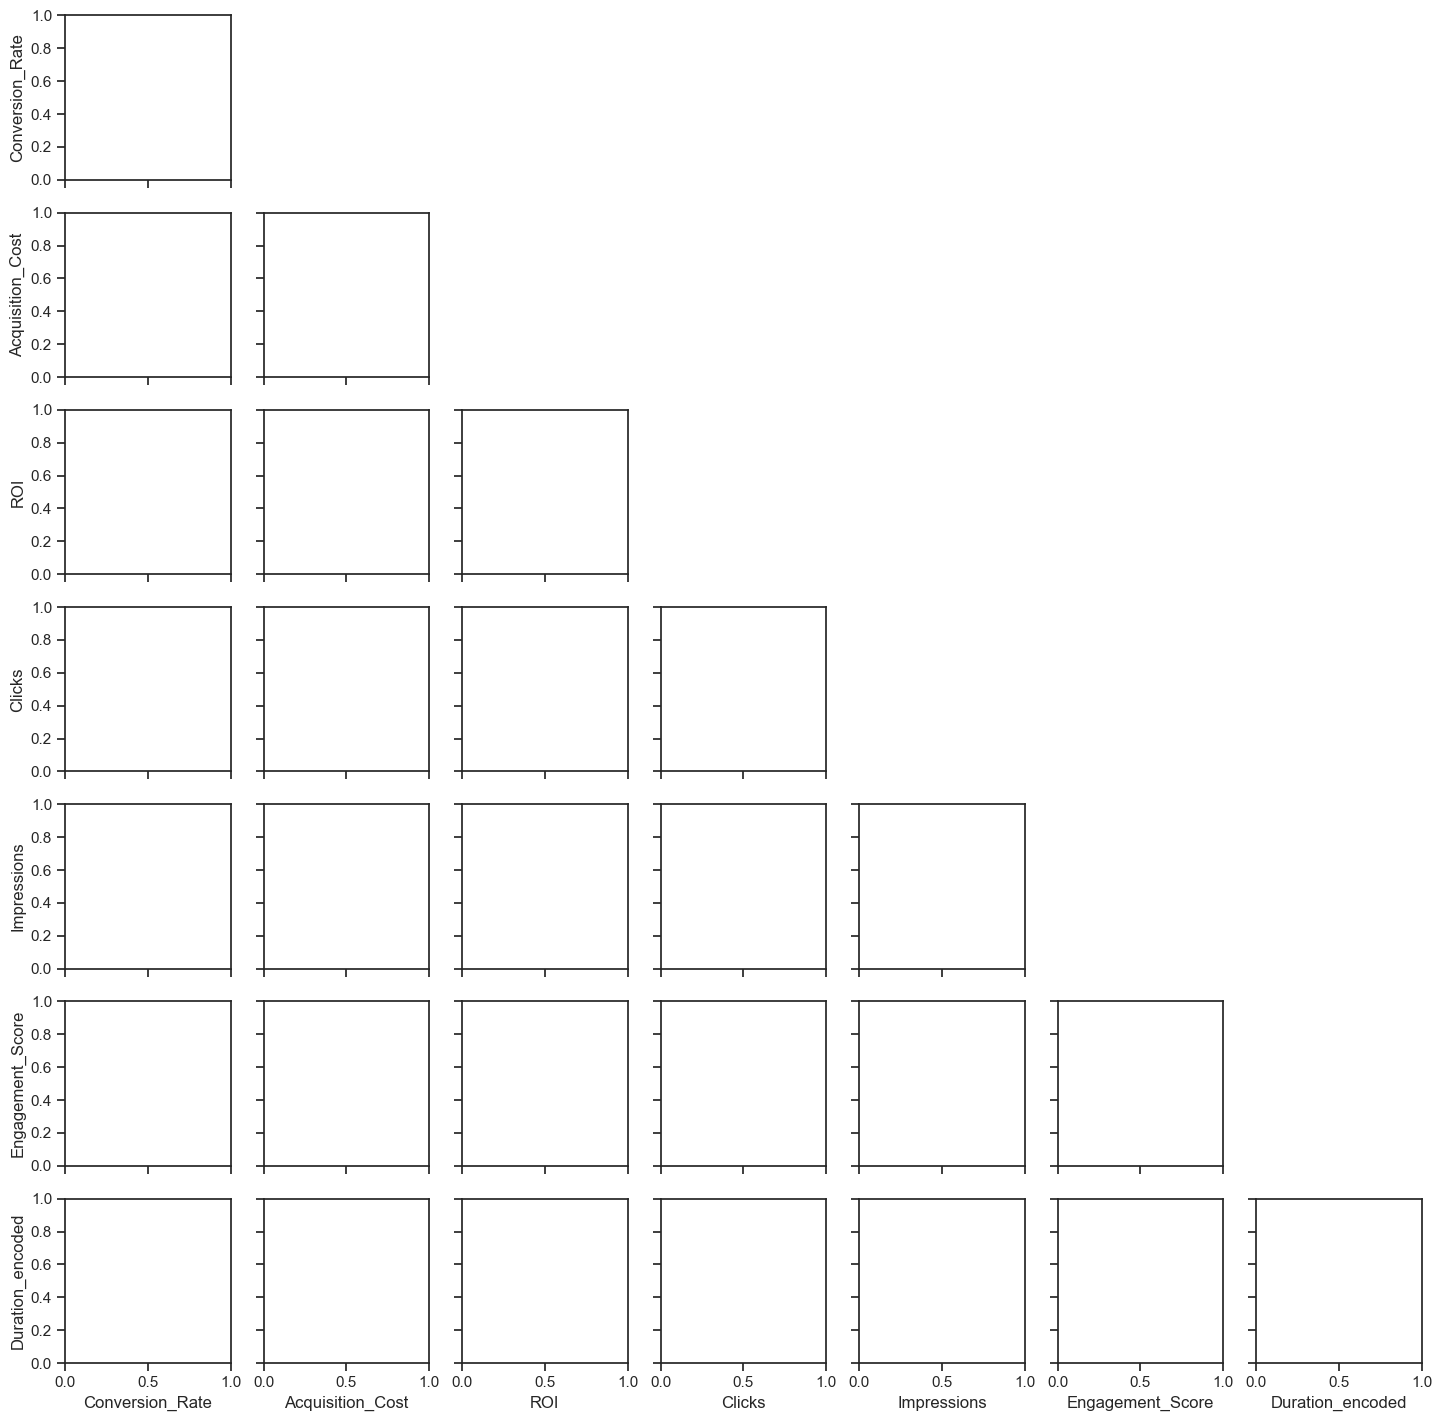

In [ ]:
# Select numeric columns for the pairplot
numeric_cols = [
    'Conversion_Rate', 
    'Acquisition_Cost', 
    'ROI', 
    'Clicks', 
    'Impressions', 
    'Engagement_Score', 
    'Duration_encoded'
]

# Create a pairplot using Seaborn
sns.set(style='ticks', palette='viridis')
pairgrid = sns.pairplot(
    df_encoded[numeric_cols],
    diag_kind='kde',      # Kernel density estimate on the diagonal
    plot_kws={'alpha': 0.6, 's': 20},  # Semi-transparent points
    corner=True           # Only plot lower triangle to reduce clutter
)

# Adjust layout and display
plt.tight_layout()
plt.show()